In [1]:
import numpy as np
import torch
import clip
import cv2
from IPython.display import Video
import matplotlib.pyplot as plt
from scipy import stats
from scipy.signal import savgol_filter

from src.clip_video_response import clip_video_response

In [2]:
path = "..\\data\\videos\\ball_kick.mp4"

# Note: uncomment if you want to view the video, otherwise leave commented.
# Embedding videos into notebook can cause UI to slow down
# Video(path, embed=True)

In [162]:
query_negative = "photo of a stationary soccer ball"
query_positive = "photo of a flying soccer ball"

In [164]:
response = clip_video_response()
negative_response = response.generate_response_curve(video_path=path, queries=[query_negative], sampling_rate=1)[0]
positive_reponse = response.generate_response_curve(video_path=path, queries=[query_positive], sampling_rate=1)[0]

filtered_negative_response = stats.zscore(savgol_filter(negative_response, 30, 3))
filtered_positive_reponse = stats.zscore(savgol_filter(positive_reponse, 30, 3))

difference_response = filtered_positive_reponse - filtered_negative_response


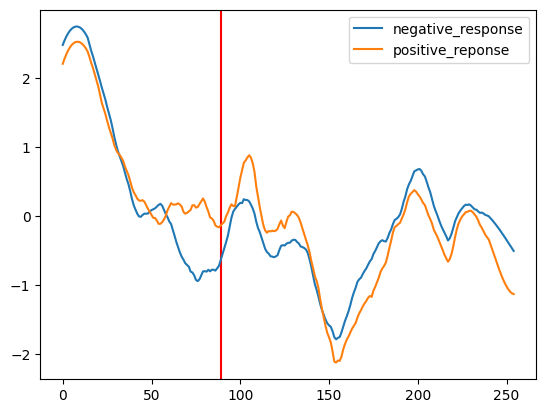

In [165]:
plt.axvline(x = 89, color = 'r', linestyle = '-')
plt.plot(filtered_negative_response, label="negative_response")
plt.plot(filtered_positive_reponse, label="positive_reponse")
plt.legend()

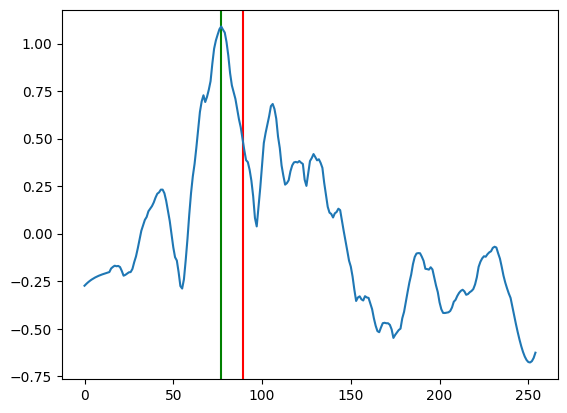

In [159]:
plt.axvline(x = 89, color = 'r', linestyle = '-')
plt.axvline(x = np.argmax(difference_response), color = 'g', linestyle = '-')
plt.plot(difference_response)

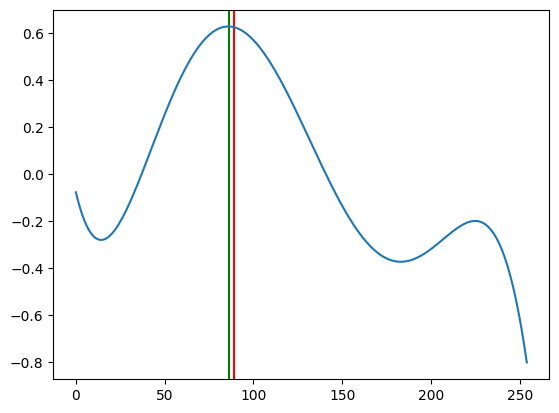

In [160]:
convex_curve = savgol_filter(difference_response, len(difference_response), 5)
plt.axvline(x = 89, color = 'r', linestyle = '-')
plt.axvline(x = np.argmax(convex_curve), color = 'g', linestyle = '-')
plt.plot(convex_curve)